### **Stack Overflow Insights**

   
With nearly 65,000 responses fielded from over 180 countries and dependent territories, the **2020 Annual Developer Survey** examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

Data: [Stack Overflow Insights](https://insights.stackoverflow.com/survey)      



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap


In [2]:
data = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values = ['no info', '.', 'NA', 'Missing'])
questions = pd.read_csv('data/survey_results_schema.csv', index_col='Column') 

In [3]:
# set options
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

In [4]:
# survey schema 
questions.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


In [5]:
# survey results
data.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack

In [6]:
# features
data.columns

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'Webframe

In [7]:
# select features for analysis 
data = data[['MainBranch', 'Age', 'ConvertedComp', 'Country', 'DevType', 'EdLevel',
             'Employment', 'Gender', 'JobFactors', 'JobSat', 'LanguageDesireNextYear',
             'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 
             'PlatformDesireNextYear', 'PlatformWorkedWith', 'UndergradMajor',
             'WebframeDesireNextYear', 'WebframeWorkedWith', 'WorkWeekHrs', 'YearsCodePro']]

In [8]:
# rename ConvertedComp
data.rename(columns={'ConvertedComp': 'AnnualSalaryUSD'}, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              64162 non-null  object 
 1   Age                     45446 non-null  float64
 2   AnnualSalaryUSD         34756 non-null  float64
 3   Country                 64072 non-null  object 
 4   DevType                 49370 non-null  object 
 5   EdLevel                 57431 non-null  object 
 6   Employment              63854 non-null  object 
 7   Gender                  50557 non-null  object 
 8   JobFactors              49349 non-null  object 
 9   JobSat                  45194 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  LanguageWorkedWith      57378 non-null  object 
 12  MiscTechDesireNextYear  42379 non-null  object 
 13  MiscTechWorkedWith      40314 non-null  object 
 14  PlatformDesireNextYear  50605 non-null

In [10]:
# convert to numeric
data['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)
data.dropna(subset=['YearsCodePro'], inplace=True)
data['YearsCodePro'] = data['YearsCodePro'].astype(int)

In [11]:
# estatistics
data.describe()

,Age,AnnualSalaryUSD,WorkWeekHrs,YearsCodePro
count,36852.000000,3.462100e+04,40922.000000,46349.000000
mean,32.269242,1.037684e+05,40.788262,8.491812
std,8.855902,2.266323e+05,17.845422,7.905296
min,1.000000,0.000000e+00,1.000000,0.000000
25%,26.000000,2.466000e+04,40.000000,3.000000
50%,30.000000,5.404900e+04,40.000000,6.000000
75%,37.000000,9.500000e+04,44.000000,12.000000
max,279.000000,2.000000e+06,475.000000,51.000000


The *Age* and *WorkWeekHrs* columns have impossible numbers (outliers). Let's fix this data by limiting to more acceptable values:


In [12]:
# limits the age between 14 and 99 years
data = data.query("Age >= 14 & Age < 100") 

In [13]:
# limits maximum hours in a week
data = data[(data['WorkWeekHrs'] < 168)]

In [14]:
# check for nulls
data.isnull().sum()

MainBranch                   0
Age                          0
AnnualSalaryUSD           5038
Country                      0
DevType                    402
EdLevel                    569
Employment                  54
Gender                     397
JobFactors                 807
JobSat                      50
LanguageDesireNextYear    1822
LanguageWorkedWith         192
MiscTechDesireNextYear    8099
MiscTechWorkedWith        9355
PlatformDesireNextYear    3394
PlatformWorkedWith        1656
UndergradMajor            2567
WebframeDesireNextYear    9466
WebframeWorkedWith        7762
WorkWeekHrs                  0
YearsCodePro                 0
dtype: int64

There are several columns with missing values. We will deal with these values later as needed.

In [15]:
data.shape

(34961, 21)

### Devs Profile    

The purpose of this analysis is to gain insights into the **tech career**. Therefore, let's select only devs that work professionally in the area:



In [16]:
# create a filter
data_devs = data[data['MainBranch'] == 'I am a developer by profession']

In [17]:
data_devs.shape

(31720, 21)

**Country**

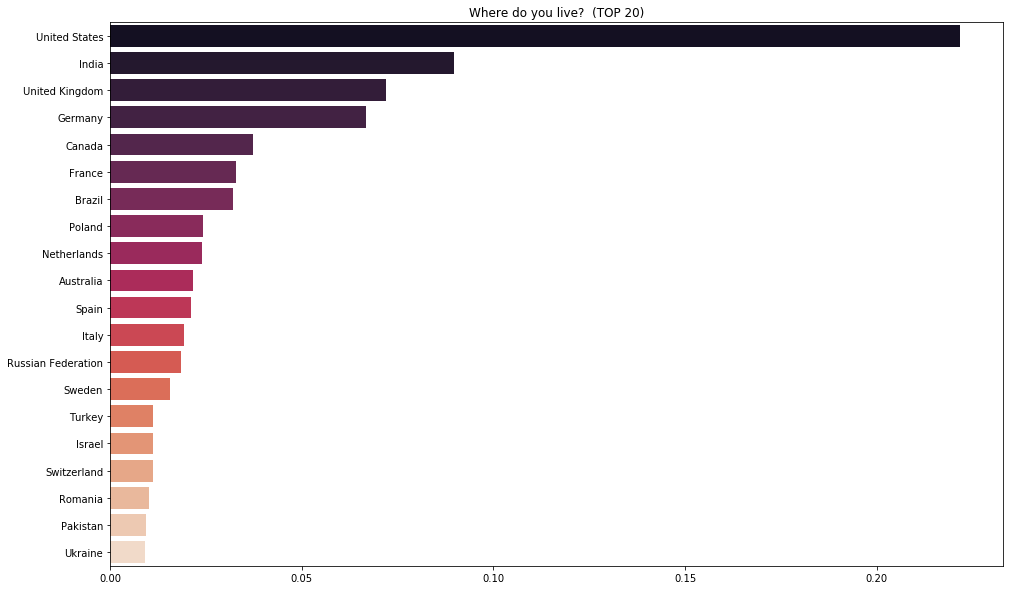


Total countries:  156


In [18]:
# top 20 countries
country_count  = data_devs['Country'].value_counts(normalize=True)
country_count = country_count[:20,]
# plot
plt.figure(figsize=(16, 10))
sns.barplot( country_count.values, country_count.index, palette="rocket")
plt.title(questions.loc['Country', 'QuestionText'] + '  (TOP 20)')
plt.show()

print('\nTotal countries: ', data['Country'].nunique())

**Gender**

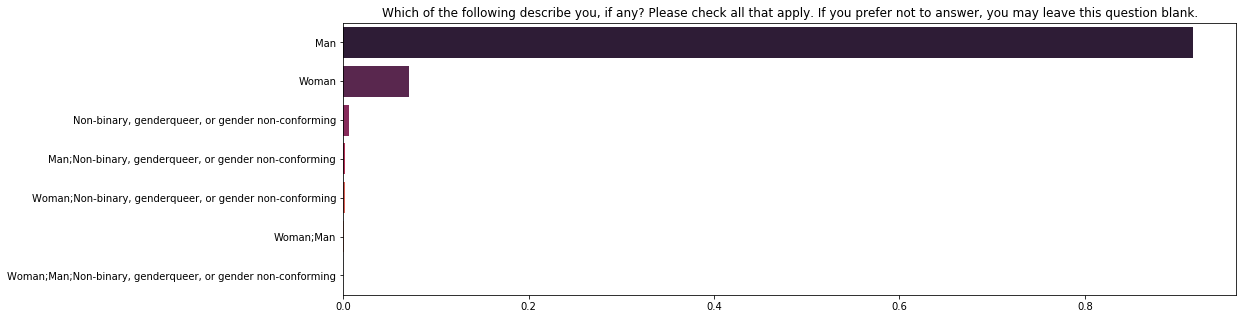

In [19]:
gender = data_devs['Gender'].value_counts(normalize=True)

# plot
plt.figure(figsize=(16, 5))
sns.barplot( gender.values, gender.index, palette="rocket")
plt.title(questions.loc['Gender', 'QuestionText'])
plt.show()

**Age**

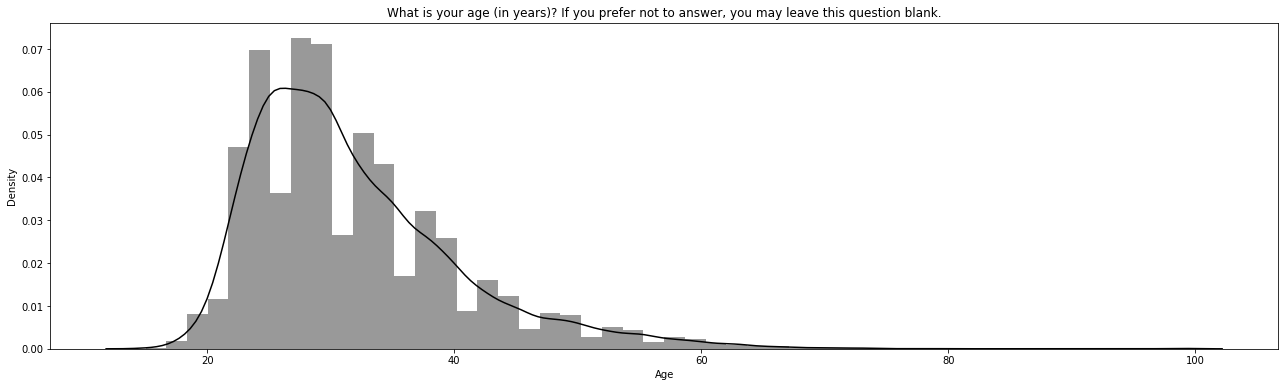

In [20]:
# plot age distribution
plt.figure(figsize=(22, 6))
sns.distplot(data_devs['Age'], kde=True, color="k")
plt.title(questions.loc['Age', 'QuestionText'])
plt.show()

**Education**

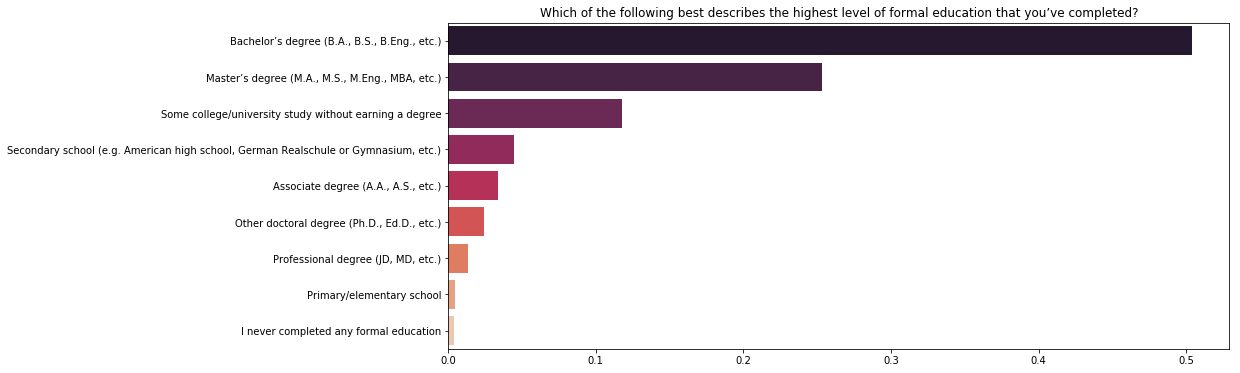

In [21]:
edlevel = data_devs['EdLevel'].value_counts(normalize=True)

# plot
plt.figure(figsize=(14, 6))
sns.barplot(edlevel.values, edlevel.index, palette='rocket')
plt.title(questions.loc['EdLevel', 'QuestionText'])
plt.show()

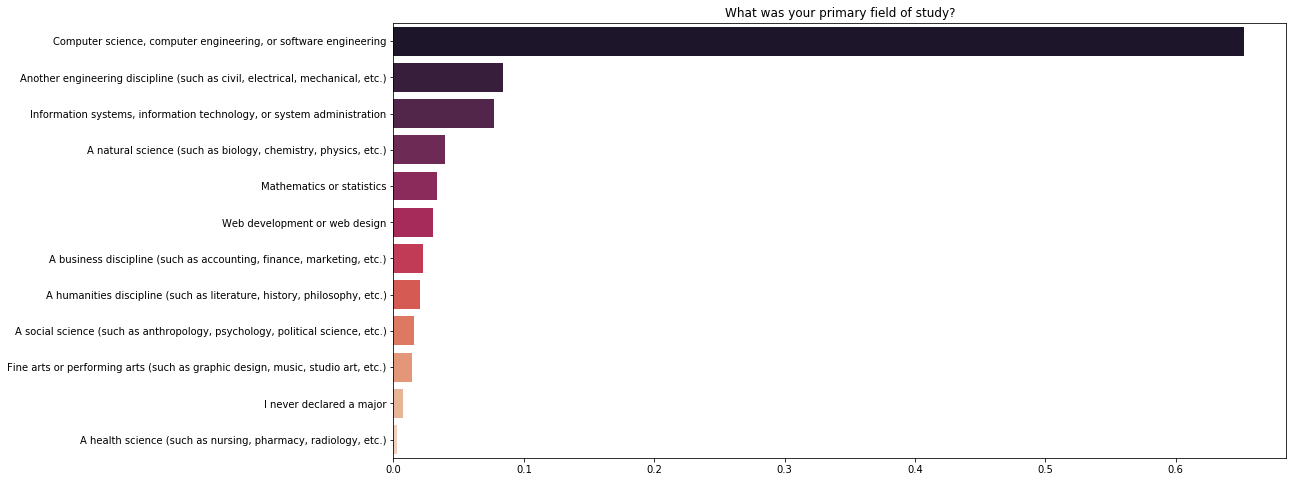

In [22]:
major = data_devs['UndergradMajor'].value_counts(normalize=True)

# plot
plt.figure(figsize=(16, 8))
sns.barplot(major.values, major.index, palette='rocket')
plt.title(questions.loc['UndergradMajor', 'QuestionText'])
plt.show()

**Professional Experience**

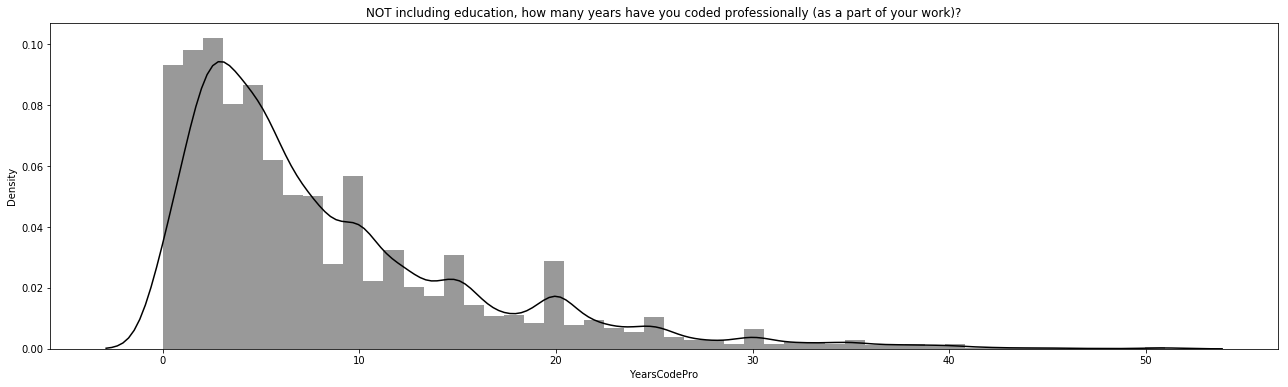

In [23]:
# plot years code distribution 
plt.figure(figsize=(22, 6))
sns.distplot(data_devs['YearsCodePro'], kde=True, color="k")
plt.title(questions.loc['YearsCodePro', 'QuestionText'])
plt.show()

**Area of expertise**

In [24]:
def split_and_plot(feature):
  '''Function to split the responses and plot for select all that apply questions'''

  df = pd.DataFrame(data_devs[feature].str.get_dummies(';').sum())
  df.reset_index(inplace=True)
  df.columns = [feature, 'Total']
  df = df.sort_values('Total', ascending=False)
  
  plt.figure(figsize=(20, 8))
  sns.barplot(x=feature, y='Total', data=df, palette="rocket")
  plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=100))
  plt.xticks(rotation=45, horizontalalignment='right')

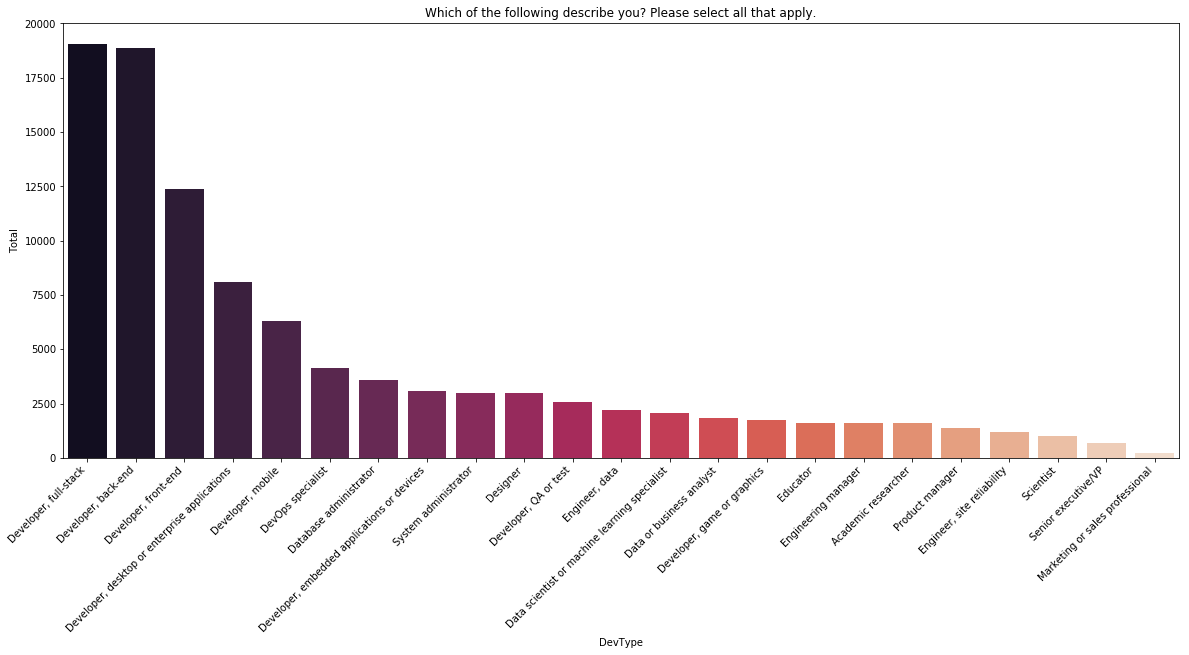

In [25]:
split_and_plot('DevType')

---

**Developers Profile**

* About the developers who participated in the research and work professionally in the area, the vast majority are from **United States, followed by India, United Kingdom, Germany and Canada.** Brazil is the 7th country with the largest number of professional developers in the research.    
* The lack of diversity among developers is quite noticeable: among the survey participants, **91% are men**.    

* The ages of developers are concentrated **between 23 and 35 years**, but we have devs up to just over 60 (in general, the retirement age range of most professionals).

* Regarding the level of formal education, half of the developers have at least the bachelor's degree. Of these, 65% are formed in **Computer Science, Computer Engineering or Software Engineering**.    

* Analyzing the professional profile, half of the respondents have **up to 6 years of experience** (not includind education). The average time of professional experience is 8.4 years. 

* Among the areas of activity, the main ones are **full-stack, back-end and front-end development**. 



---

### **Technologies**

**Most commonly used programming languages**

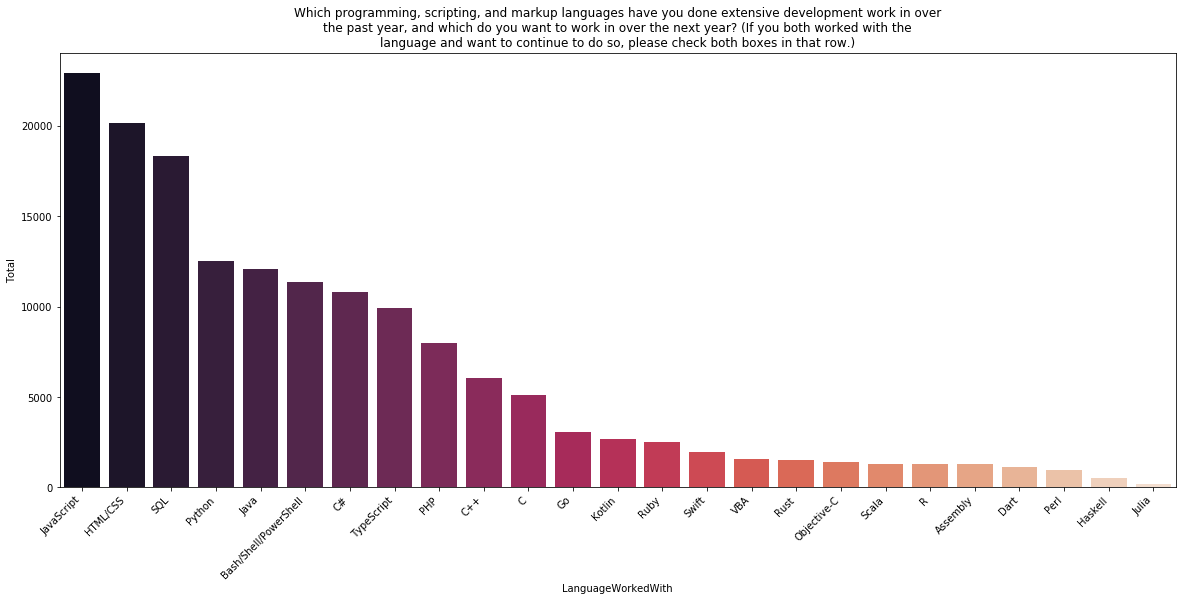

In [26]:
split_and_plot('LanguageWorkedWith')

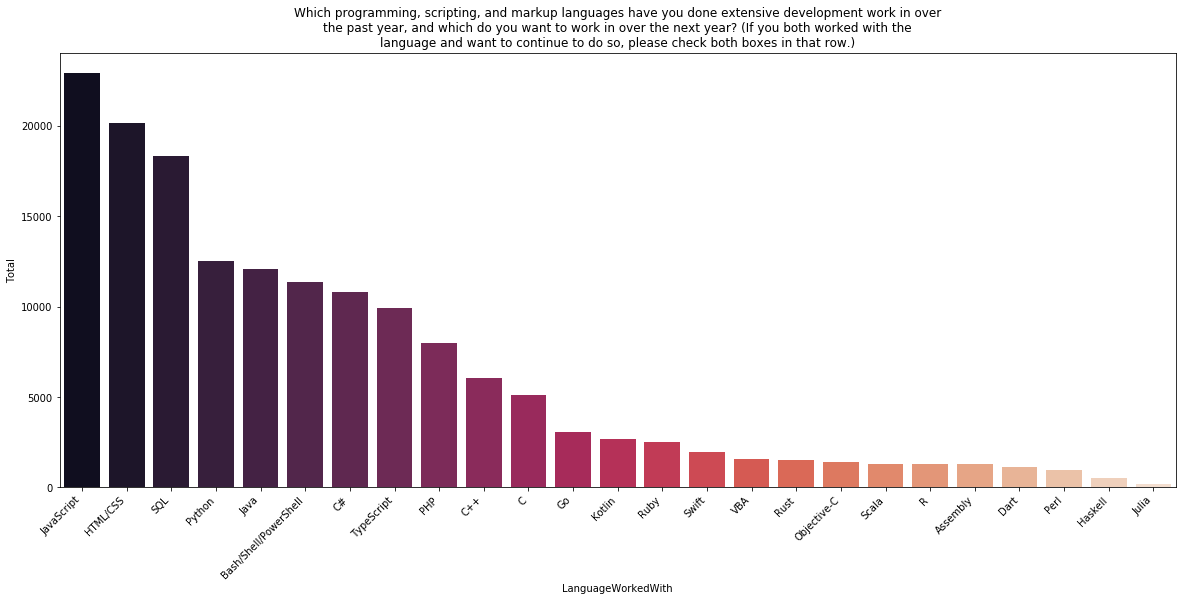

In [27]:
split_and_plot('LanguageWorkedWith')

**Programming languages desired for next year**

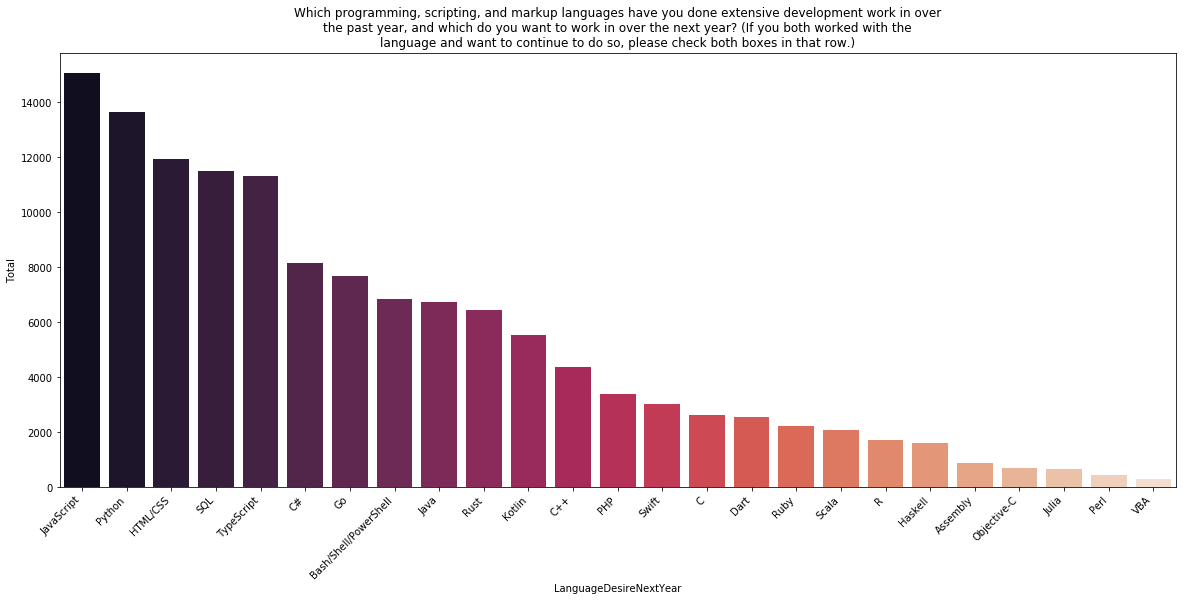

In [28]:
split_and_plot('LanguageDesireNextYear')

**Most commonly used Web frameworks**

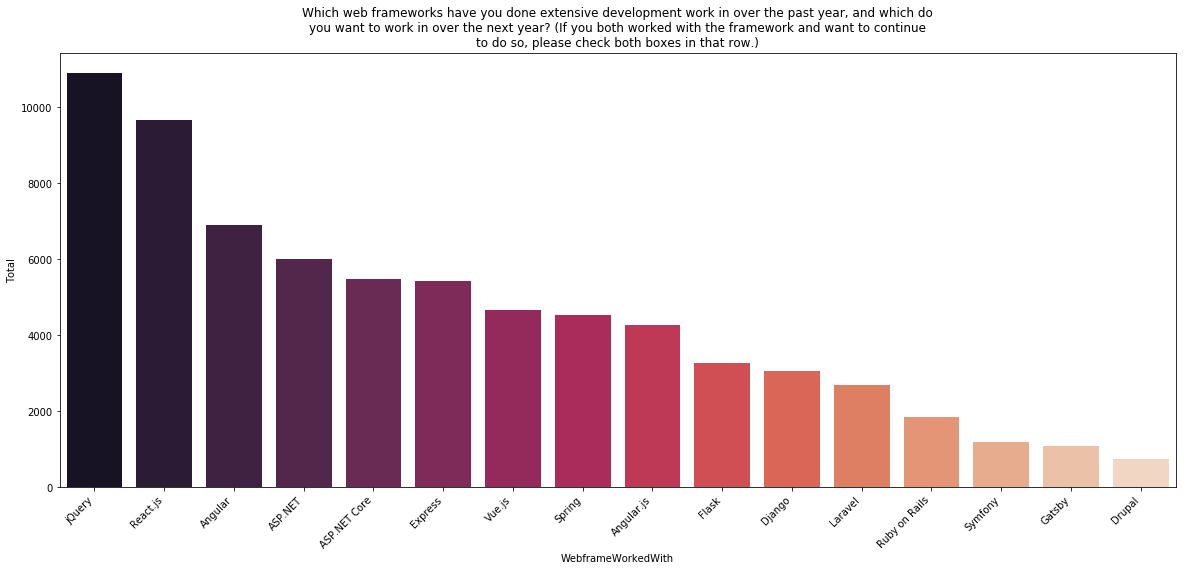

In [29]:
split_and_plot('WebframeWorkedWith')

**Web frameworks desired for next year**


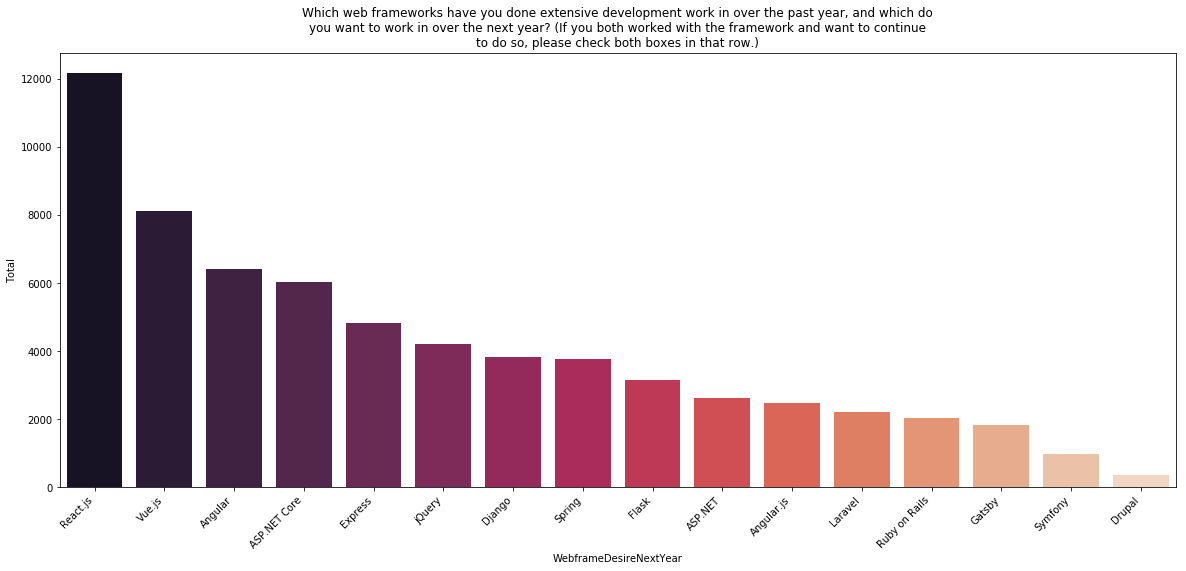

In [30]:
split_and_plot('WebframeDesireNextYear')

**Other Frameworks, Libraries, and Tools**

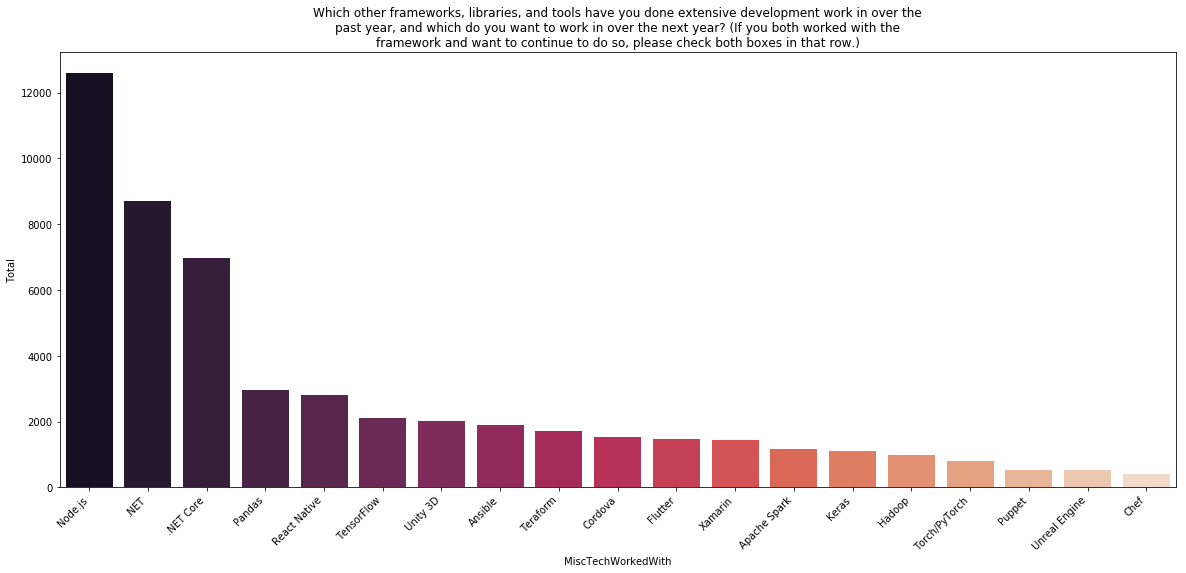

In [31]:
split_and_plot('MiscTechWorkedWith')

**Other Frameworks, Libraries, and Tools desired for next year**

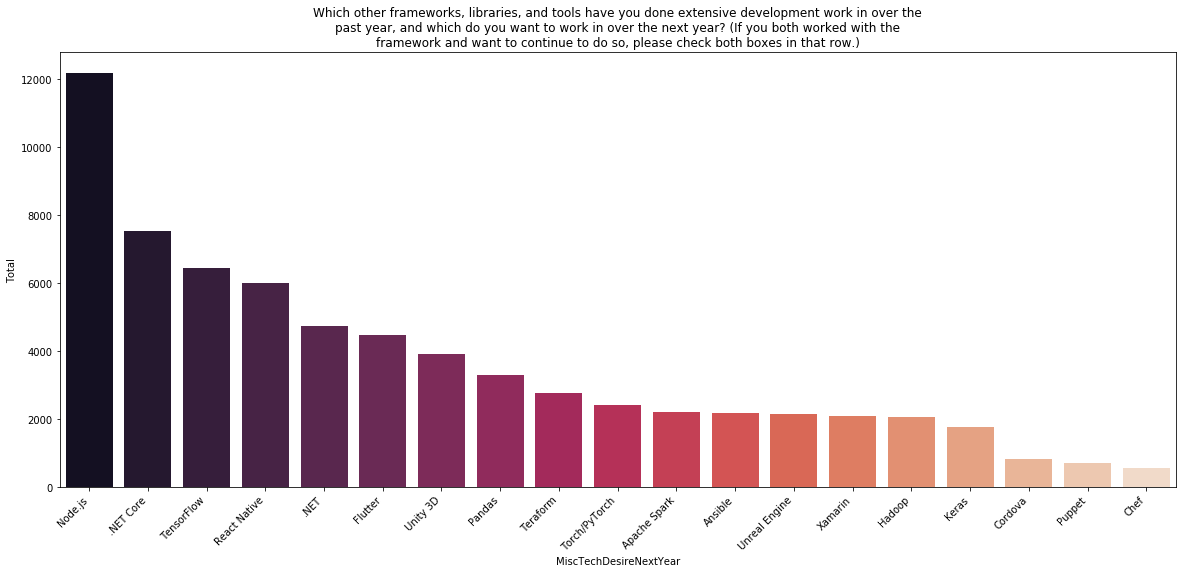

In [32]:
split_and_plot('MiscTechDesireNextYear')

---

**Programming Languages & Frameworks**

* The top 5 programming languages used by professional developers in the last year were **Javascript, HTML/CSS, SQL, Python and Java**.

* For those who want to enter the area, it is worth keeping an eye also on the languages that the devs intend to work next year: among them are **Javascript, Python, HTML/CSS, SQL and TypeScript**.

* About the frameworks, the most used in the last year were **jQuery, React.js and Angular**. Among the most desired to work next year, **Vue.js** gains prominence, React.js and Angular remains among the favorites.
* Among the other technologies researched, **Node.js** was the most used and remains the preferred for 2021.
* Interesting to note that data science tools such as **Pandas, TensorFlow, and Torch/PyTorch** are gaining popularity. 


---

### **Salary**     

In [33]:
# create a subset
salary = data_devs.loc[:, ['Country', 'DevType', 'Age', 'YearsCodePro', 'Employment',
                           'WorkWeekHrs', 'AnnualSalaryUSD', 'JobSat']]
# drop nan values
salary.replace(0, np.nan, inplace=True)
salary.dropna(inplace=True)
salary.head()

,Country,DevType,Age,YearsCodePro,Employment,WorkWeekHrs,AnnualSalaryUSD,JobSat
Respondent,,,,,,,,
8,United States,"Developer, back-end;Developer, desktop or ente...",36.0,13.0,Employed full-time,39.0,116000.0,Slightly dissatisfied
10,United Kingdom,"Database administrator;Developer, full-stack;D...",22.0,4.0,Employed full-time,36.0,32315.0,Very satisfied
11,United Kingdom,"Developer, back-end;Developer, desktop or ente...",23.0,2.0,Employed full-time,40.0,40070.0,Slightly dissatisfied
12,Spain,"Designer;Developer, front-end",49.0,7.0,Employed full-time,40.0,14268.0,Very dissatisfied
14,United States,"Developer, desktop or enterprise applications;...",27.0,1.0,Employed full-time,40.0,66000.0,Slightly satisfied


We know that salaries above or below the market average exist, so let's treat outliers just by removing the most extreme values:

In [34]:
print('Salaries lower than: USD', data['AnnualSalaryUSD'].quantile(0.05)) # 5% lower wages
print('Salaries higher than: USD', data['AnnualSalaryUSD'].quantile(0.95)) # 5% higher wages

Salaries lower than: USD 5772.0
Salaries higher than: USD 258519.0


In [35]:
# remove outliers
salary = data_devs.query("AnnualSalaryUSD >= 5773 & AnnualSalaryUSD <= 250000") 

In [36]:
# statistics
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,24537.0,32.109031,8.237804,15.0,26.0,30.0,36.0,99.0
AnnualSalaryUSD,24537.0,65118.092921,47332.166298,5784.0,28692.0,54289.0,89929.0,250000.0
WorkWeekHrs,24537.0,40.055200,10.106361,1.0,40.0,40.0,41.0,160.0
YearsCodePro,24537.0,8.672780,7.527300,0.0,3.0,6.0,12.0,51.0


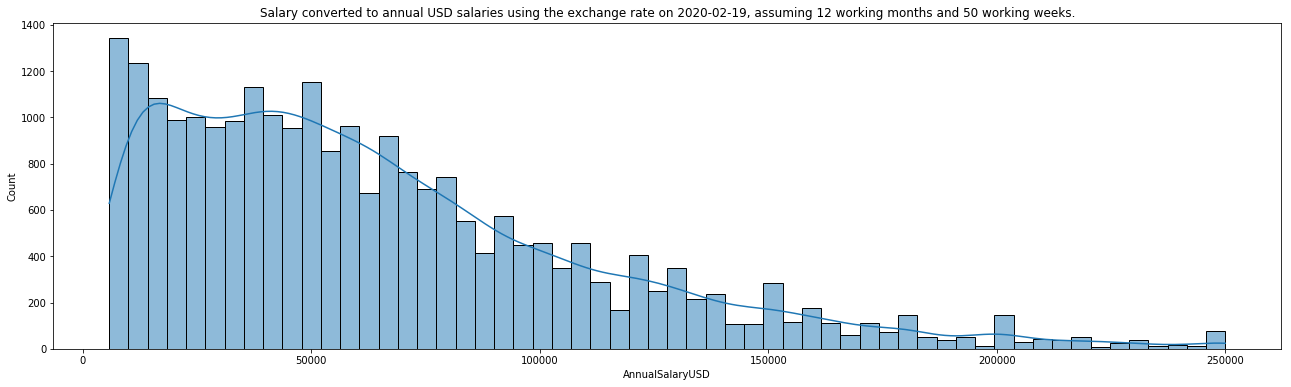

In [37]:
# plot annual salaries distribution
plt.figure(figsize=(22, 6))
sns.histplot(data=salary, x='AnnualSalaryUSD', kde=True)
plt.title(questions.loc['ConvertedComp', 'QuestionText'])
plt.show()

* When we look at the distribution of developers' salaries, we see a concentration of salaries up to the USD 50k range. It is important to realize that fairly high salaries pull the average salary up (65k/year), however half of the devs earn up to UDS 54,289 per year.

**Salary x Years of Professional Experience**

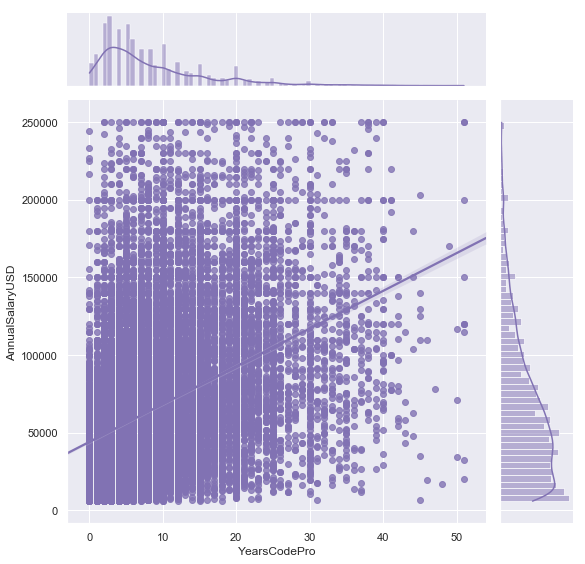

In [38]:
sns.set(style="darkgrid")
sns.jointplot("YearsCodePro","AnnualSalaryUSD", data=salary,
                  kind="reg", truncate=False,
                  color="m", height=8)

* In the chart above, we can notice a positive correlation between years of professional experience and salaries, but it is not a determining factor since we have professionals with little experience time and high salaries and vice versa.

---

**Wage comparison by Country**    


Comparing salaries between countries with the most participants in the research and Brazil. To try to reduce the bias of the analysis, we will filter only the salaries of professionals who identify themselves as a full-stack developer, and are employed full-time with the same workload:

* Area of expertise: Full-stack Developer
* Employment: full-time 
* Workload 40h/week 

In [39]:
# back-end dev filter 
salary_fullstack = salary.loc[salary['DevType'].str.contains('full-stack', na=False)]
# employment filter
salary_fullstack = salary_fullstack.query("Employment == 'Employed full-time' and WorkWeekHrs == 40")

print('Full-stack developers: ', salary_fullstack.shape[0])

Full-stack developers:  6846


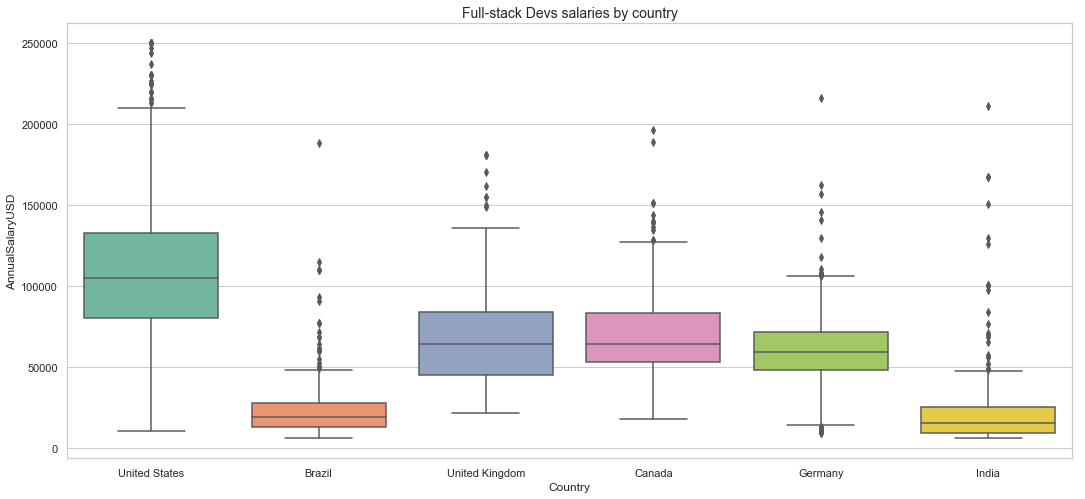

In [45]:
# Selecting some countries of interest for comparison
countries = ['United States', 'United Kingdom', 'India', 'Germany', 'Canada', 'Brazil']
filt = salary_fullstack['Country'].isin(countries)
comp_countries = salary_fullstack.loc[filt, ['Country', 'AnnualSalaryUSD']]

# plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Country', y='AnnualSalaryUSD', data=comp_countries, palette='Set2')
plt.title('Full-stack Devs salaries by country', fontsize=14)
plt.show()

* Although the U.S. draws attention to higher wages, the variation between higher and lower wages is much greater. 

* India and Brazil have less wage variation, but the devaluation of the real and the Indian rupee against the dollar leaves the average wage much lower compared to other countries.

* UK and Canada seem like good options for early career professionals, as even the lowest salaries are still better than the lowest salaries in other countries.    
    
1 US Dollar = 4.4723 Brazilian Reais (02/28/2020)

---

### **Job Satisfaction**
  

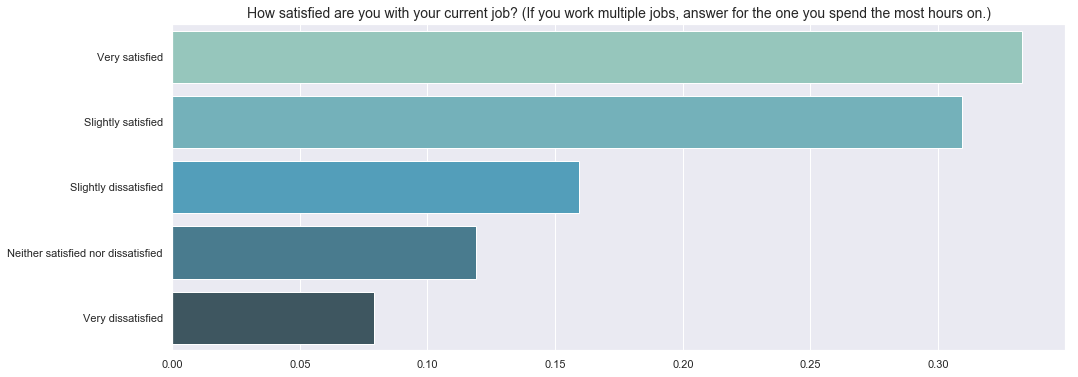

In [41]:
job_sat = data_devs['JobSat'].value_counts(normalize=True)
#plot
plt.figure(figsize=(16, 6))
sns.barplot(job_sat.values, job_sat.index, palette='GnBu_d')
plt.title(questions.loc['JobSat', 'QuestionText'], fontsize=14)
plt.show()

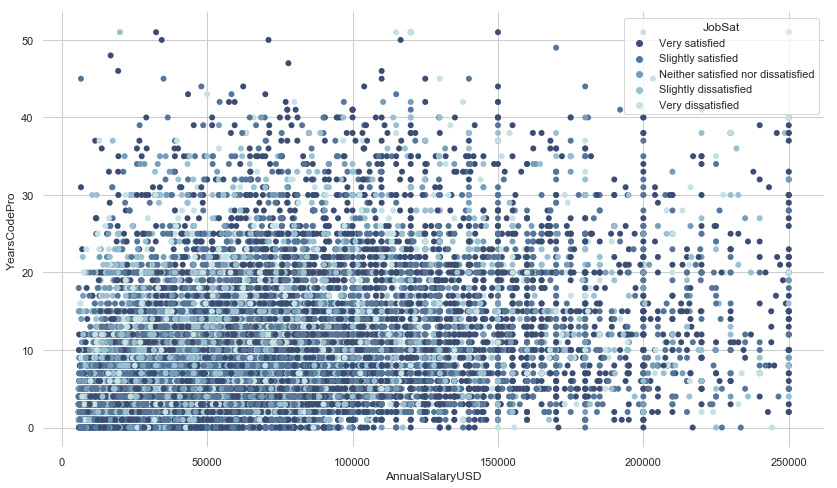

In [42]:
# Creates a chart with different color dots for each level of satisfaction
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 8))
sns.despine(f, left=True, bottom=True)
sat_ranking = ["Very satisfied", "Slightly satisfied", 
               "Neither satisfied nor dissatisfied", 
               "Slightly dissatisfied", "Very dissatisfied"]
sns.scatterplot(x="AnnualSalaryUSD", y="YearsCodePro", hue="JobSat",
                palette="ch:r=-.2,d=.3_r", hue_order=sat_ranking, 
                linewidth=0, data=salary, ax=ax)

* The different levels of satisfaction are mixed in the chart, which indicates that developers with the highest salaries are not necessarily the most satisfied and vice versa.    
So what are the other work factors important to developers? 



**Most important job factors**    
In a situation with two job offers, in the same region and with the same salary and benefits. What are the most important factors for the decision?

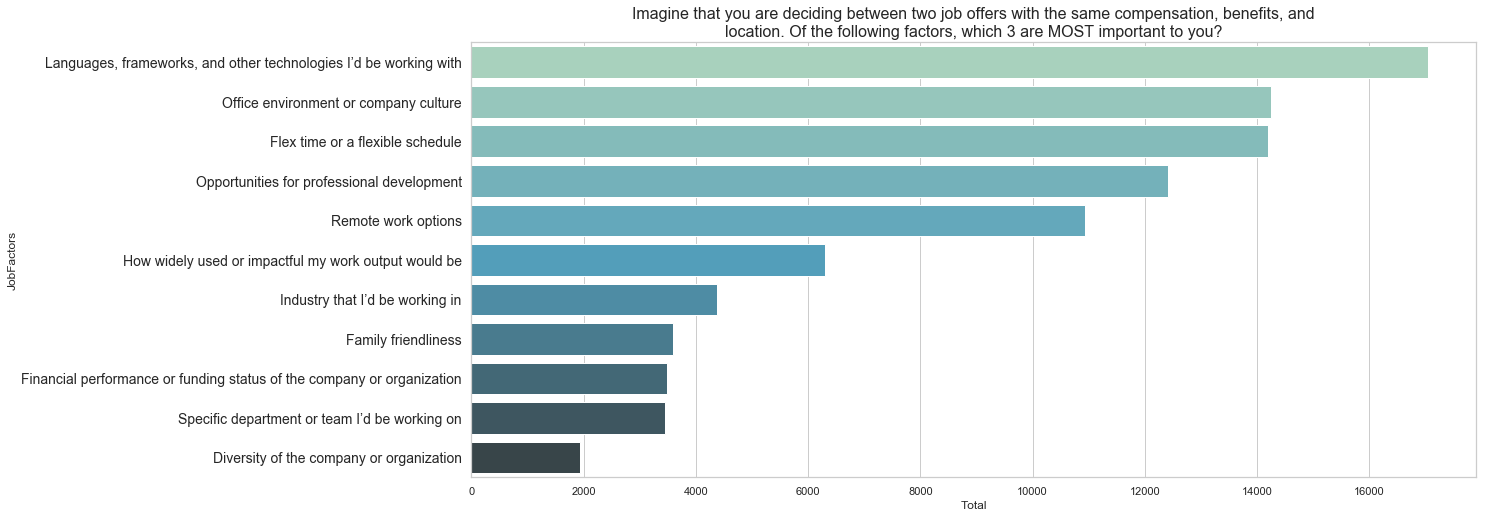

In [43]:
# extracts the options of each response and creates a df
job_factors = pd.DataFrame(data_devs['JobFactors'].str.get_dummies(';').sum())
job_factors.reset_index(inplace=True)
job_factors.columns = ['JobFactors', 'Total']
job_factors = job_factors.sort_values('Total', ascending=False)

# plot
plt.figure(figsize=(18, 8))
sns.barplot(x='Total', y='JobFactors', data=job_factors, palette="GnBu_d")
plt.title(textwrap.fill(questions.loc['JobFactors', 'QuestionText'], width=100), fontsize=16)
plt.yticks(fontsize=14)
plt.show()

Is a good salary important? Absolutely! But there are other very important factors for developers when deciding on a job offer.    
The main ones are **the technologies that will be used, the work environment or culture of the company and the flexibility of time**. 

---

In [44]:
# author: @priscillapreks
# 01.04.2020